In [43]:
from sklearn.datasets import load_boston
from numpy import *
import matplotlib.pyplot as plt 
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
from sklearn import preprocessing

boston = load_boston()

In [44]:
print("Shape of Dataset : ", boston.data.shape)
print("Feature names : ", boston.feature_names)
print("Target Values : ", boston.target[:20])

Shape of Dataset :  (506, 13)
Feature names :  ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
Target Values :  [24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2]


In [45]:
X = pd.DataFrame(boston.data, columns = boston.feature_names)
Y = boston.target   
print(X.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  


In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33,random_state=12)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)
print(X_train.head(2))                                              # Standardizing Data 
print(X_train.head(2))

(339, 13)
(167, 13)
(339,)
(167,)
         CRIM   ZN  INDUS  CHAS    NOX     RM    AGE     DIS   RAD    TAX  \
379  17.86670  0.0   18.1   0.0  0.671  6.223  100.0  1.3861  24.0  666.0   
474   8.05579  0.0   18.1   0.0  0.584  5.427   95.4  2.4298  24.0  666.0   

     PTRATIO       B  LSTAT  
379     20.2  393.74  21.78  
474     20.2  352.58  18.14  
         CRIM   ZN  INDUS  CHAS    NOX     RM    AGE     DIS   RAD    TAX  \
379  17.86670  0.0   18.1   0.0  0.671  6.223  100.0  1.3861  24.0  666.0   
474   8.05579  0.0   18.1   0.0  0.584  5.427   95.4  2.4298  24.0  666.0   

     PTRATIO       B  LSTAT  
379     20.2  393.74  21.78  
474     20.2  352.58  18.14  


In [61]:
X_train_standardized = (X_train - X_train .mean()) / X_train.std()
X_test_standardized  = (X_test - X_train.mean()) /  X_train.std()

In [62]:
def training():
    X_train_standardized = (X_train - X_train .mean()) / X_train.std()
    X_test_standardized  = (X_test - X_train.mean()) /  X_train.std()
def error_function(y_actual,y_predicted):
    error = 0
    for i in range(0,len(y_actual)):
        error =  error + pow((y_actual[i] - y_predicted[i]),2)
        return error/(2*len(y_actual))

def y_predicted(w,x):
    y_pred = np.zeros(len(x))
    for i in range(0,len(x)):
        for j in range(0,len(w)):
            y_pred[i] = y_pred[i]+(w[j]*x[i][j] + w[-1])
    return y_pred

def gradient_descent(y_actual,y_pred,x):
    grad = np.zeros(x.shape[1])
    for i in range(x.shape[1]):
        for j in range(0,len(y_actual)):
            grad[i] = - (y_actual[j] - y_pred[j])*x[j][i] + grad[i]
    return grad/len(y_actual)


def weights(x_train,y_train,num_iterations,learning_rate):
    no_of_rows = x_train.shape[0]
    no_of_columns = x_train.shape[1]
    new_x_train = np.ones((no_of_rows,no_of_columns+1))
    new_x_train[:,0:no_of_columns] = x_train
    w = np.zeros(no_of_columns)
    w =np.append(w,1)
    for i in range(0,num_iterations):
        y_pred = y_predicted(w,new_x_train)
        error = error_function(y_train,y_pred)
        MSE_points.append(error)
        grad = gradient_descent(y_train,y_pred,new_x_train)
        w = w - learning_rate*grad
        learning_rate = learning_rate/1.005   
        # Learning rate Decay 
    print("mean square error: ",error)
    epox=[]
    for i in range(300):
        epox.append(i)
    plt.scatter(epox,MSE_points)
    plt.xlabel("Prices: $Y_i$")
    plt.ylabel("Predicted prices: $\hat{Y}_i$")
    plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
    plt.show()
    return w

def regression_test(x_test,w):
    row = x_test.shape[0]
    column = x_test.shape[1]
    new_x_test = np.ones((row,column+1))
    new_x_test[:,0:column] = x_test
    y_pred = y_predicted(w,new_x_test)
    return(y_pred)

mean square error:  0.04408775019781009


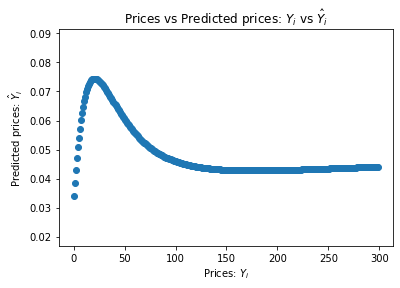

0.042904243736513234

In [63]:
MSE_points = []
num_iterations = 300
learning_rate = 0.005
w = weights(X_train_standardized,Y_train,num_iterations,learning_rate)
Y_pred = regression_test(X_test_standardized,w)
error_function(Y_test,Y_pred)

In [64]:
pred_df = pd.DataFrame(
    {
        'Actual Value' : Y_test, 
     'Predicted Values' : Y_pred,
    }
)
pred_df.head(10)

,Actual Value,Predicted Values
0,20.7,24.485501
1,12.7,16.353102
2,8.5,9.688284
3,25.1,28.889790
4,28.2,28.325383
5,22.5,23.267241
6,18.2,21.584482
7,43.5,33.797580
8,36.1,29.874727
9,23.8,24.968476


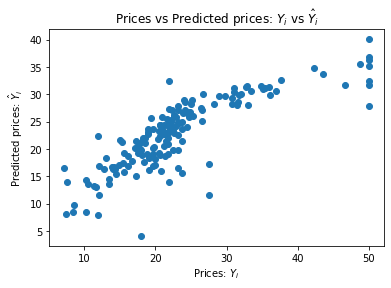

In [65]:
plt.scatter(Y_test, Y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.show()

In [66]:
from sklearn.metrics import r2_score
r2 = r2_score(Y_test,Y_pred)
n=506
k=13
adj_r2_score = 1 - ((1-r2)*(n-1)/(n-k-1))
print(adj_r2_score)

0.6540481835988734
